importing packages required to build the model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

reading the data


In [ ]:
data = pd.read_csv("parameters.csv")

In [ ]:
print(data.describe())
print(data.info())

               sr          rr          t          lm          bo         rem  \
count  630.000000  630.000000  630.00000  630.000000  630.000000  630.000000   
mean    71.600000   21.800000   92.80000   11.700000   90.900000   88.500000   
std     19.372833    3.966111    3.52969    4.299629    3.902483   11.893747   
min     45.000000   16.000000   85.00000    4.000000   82.000000   60.000000   
25%     52.500000   18.500000   90.50000    8.500000   88.500000   81.250000   
50%     70.000000   21.000000   93.00000   11.000000   91.000000   90.000000   
75%     91.250000   25.000000   95.50000   15.750000   94.250000   98.750000   
max    100.000000   30.000000   99.00000   19.000000   97.000000  105.000000   

             sr.1          hr          sl  
count  630.000000  630.000000  630.000000  
mean     3.700000   64.500000    2.000000  
std      3.054572    9.915277    1.415337  
min      0.000000   50.000000    0.000000  
25%      0.500000   56.250000    1.000000  
50%      3.5000

In [ ]:
name = ["snoring rate", "respiration rate", "body temperature", "limb movement", "blood oxygen", "eye movement",
        "sleeping hours", "heart rate", "stress level"]
data.columns = name

In [ ]:
data.isnull().any()

snoring rate        False
respiration rate    False
body temperature    False
limb movement       False
blood oxygen        False
eye movement        False
sleeping hours      False
heart rate          False
stress level        False
dtype: bool

defining shape of the array

In [ ]:
data.shape

(630, 9)

In [ ]:
data.head()

,snoring rate,respiration rate,body temperature,limb movement,blood oxygen,eye movement,sleeping hours,heart rate,stress level
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
print(data['stress level'].value_counts())
x_values = data[["snoring rate", "respiration rate", "body temperature", "limb movement", "blood oxygen", "eye movement",
               "sleeping hours", "heart rate"]]
y_values = data['stress level']

3    126
1    126
0    126
2    126
4    126
Name: stress level, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_values,y_values,test_size=0.25,random_state=10)
x_train.shape, x_test.shape

((472, 8), (158, 8))

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_values,y_values,test_size=0.3,random_state=10)
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.transform(x_test)

**label encoding**: converted to binary matrices to convert data to machine readable form

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
num_levels=5
y_train=to_categorical(y_train, num_levels)
y_test=to_categorical(y_test, num_levels)
y_train[:5]

array([[1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], dtype=float32)

**tensorflow**: library for numerical computing

**keras**: package to help beulid the numerical data

**sequential**: create layer by layer model

**dense**: perform process on the input and output layers

**dropuout**: helps in generalisation so data is trained on evenly at each point

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

**relu**: helps focus on each neuron at a time

**softmax**: helps maximise performance of neural network

In [ ]:
model=Sequential()
model.add(Dense(125, activation="relu"))
model.add(Dense(125, activation="relu"))
model.add(Dense(5, "softmax"))

**epoch**: no. of times it will go through the dataset during training

**cross-entropy**: to evaluate loss function for one-hot encoded (binary) labels

**adam optimizer**: adaptative moment estimation - used to optimize model to best fit using the stochastic gradient descent (finds parameters for best fit)

In [ ]:
epochs = 50
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
stats=model.fit(x_train, y_train, epochs=epochs, shuffle=True, batch_size=1, validation_split=0.2)

Epoch 1/50
352/352 [==============================] - 2s 3ms/step - loss: 3.2198 - accuracy: 0.5256 - val_loss: 1.4489 - val_accuracy: 0.5281
Epoch 2/50
352/352 [==============================] - 1s 3ms/step - loss: 0.5332 - accuracy: 0.8636 - val_loss: 2.1626 - val_accuracy: 0.5281
Epoch 3/50
352/352 [==============================] - 1s 2ms/step - loss: 0.6259 - accuracy: 0.8636 - val_loss: 0.0162 - val_accuracy: 1.0000
Epoch 4/50
352/352 [==============================] - 1s 2ms/step - loss: 0.0151 - accuracy: 1.0000 - val_loss: 0.0125 - val_accuracy: 1.0000
Epoch 5/50
352/352 [==============================] - 1s 2ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 6/50
352/352 [==============================] - 1s 4ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0104 - val_accuracy: 1.0000
Epoch 7/50
352/352 [==============================] - 2s 4ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0068 - val_accuracy: 1.0000
Epoch 

In [ ]:
accuracy=model.evaluate(x_test, y_test)

6/6 [==============================] - 0s 3ms/step - loss: 7.0322e-05 - accuracy: 1.0000


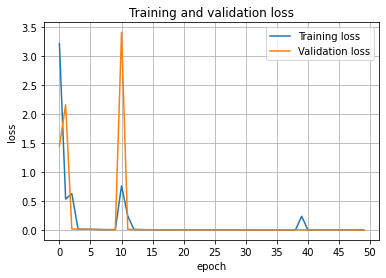

In [ ]:
model_data=pd.DataFrame(stats.history)
model_data['epoch']=list(range(epochs))
sns.lineplot(y='loss', x='epoch', data=model_data, label="Training loss")
sns.lineplot(y='val_loss', x='epoch', data=model_data, label="Validation loss")
plt.grid()
plt.legend()
plt.title("Training and validation loss")
plt.xticks(range(0, 51, 5));

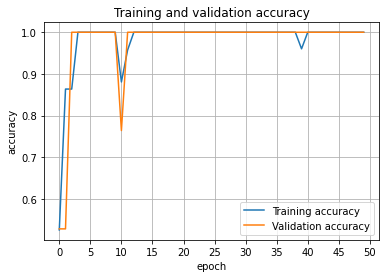

In [ ]:
model_data=pd.DataFrame(stats.history)
model_data['epoch']=list(range(epochs))
sns.lineplot(y='accuracy', x='epoch', data=model_data, label="Training accuracy")
sns.lineplot(y='val_accuracy', x='epoch', data=model_data, label="Validation accuracy")
plt.grid()
plt.legend()
plt.title("Training and validation accuracy")
plt.xticks(range(0, 51, 5));